In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
conn = sqlite3.connect('im.db')
cur = conn.cursor()

In [2]:
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")

table_names = cur.fetchall()
table_names


[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [24]:
im_df=pd.read_sql("""
SELECT start_year,genres,averagerating,runtime_minutes
FROM movie_basics 
JOIN movie_ratings 
USING (movie_id)
WHERE start_year >= 2015
AND averagerating >= 7.0
ORDER BY averagerating DESC


""",conn)
im_df

,start_year,genres,averagerating,runtime_minutes
0,2018,Documentary,10.0,52.0
1,2018,"Comedy,Drama",10.0,129.0
2,2015,Documentary,10.0,31.0
3,2017,Drama,10.0,NaN
4,2015,Documentary,10.0,70.0
...,...,...,...,...
13580,2019,Documentary,7.0,79.0
13581,2019,Documentary,7.0,50.0
13582,2019,Documentary,7.0,90.0
13583,2019,Documentary,7.0,81.0


In [93]:
im_df

,start_year,genres,averagerating,runtime_minutes
0,2018,Documentary,10.0,52.0
1,2018,"Comedy,Drama",10.0,129.0
2,2010,"Crime,Documentary",10.0,100.0
3,2012,Documentary,10.0,72.0
4,2015,Documentary,10.0,31.0
...,...,...,...,...
23565,2019,Documentary,7.0,79.0
23566,2019,Documentary,7.0,50.0
23567,2019,Documentary,7.0,90.0
23568,2019,Documentary,7.0,81.0


In [48]:
im_df=pd.read_sql("""
SELECT start_year,genres,averagerating,runtime_minutes
FROM movie_basics 
JOIN movie_ratings 
USING (movie_id)

WHERE averagerating >=7.0
AND runtime_minutes IS NOT NULL
AND genres  IS NOT NULL
ORDER BY averagerating  DESC






""",conn)
im_df

,start_year,genres,averagerating,runtime_minutes
0,2018,Documentary,10.0,52.0
1,2018,"Comedy,Drama",10.0,129.0
2,2010,"Crime,Documentary",10.0,100.0
3,2012,Documentary,10.0,72.0
4,2015,Documentary,10.0,31.0
...,...,...,...,...
23565,2019,Documentary,7.0,79.0
23566,2019,Documentary,7.0,50.0
23567,2019,Documentary,7.0,90.0
23568,2019,Documentary,7.0,81.0


In [40]:
im_df.duplicated().sum()

2128

In [42]:
im_df.drop_duplicates(inplace=True)

In [43]:
im_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21442 entries, 0 to 23569
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_year       21442 non-null  int64  
 1   genres           21442 non-null  object 
 2   averagerating    21442 non-null  float64
 3   runtime_minutes  21442 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 837.6+ KB


In [56]:
value_counts=im_df['genres'].value_counts()
value_counts

Documentary                        5960
Drama                              3469
Comedy                              962
Comedy,Drama                        765
Biography,Documentary               433
                                   ... 
Game-Show                             1
Adventure,Animation,Documentary       1
Action,Biography,History              1
Musical,Thriller                      1
Sci-Fi,War                            1
Name: genres, Length: 657, dtype: int64

In [72]:
im_cleaned=im_df
im_cleaned

,start_year,genres,averagerating,runtime_minutes
0,2018,Documentary,10.0,52.0
1,2018,"Comedy,Drama",10.0,129.0
2,2010,"Crime,Documentary",10.0,100.0
3,2012,Documentary,10.0,72.0
4,2015,Documentary,10.0,31.0
...,...,...,...,...
23565,2019,Documentary,7.0,79.0
23566,2019,Documentary,7.0,50.0
23567,2019,Documentary,7.0,90.0
23568,2019,Documentary,7.0,81.0


In [86]:
im_cleaned_100=im_cleaned.head(100)
im_cleaned_100

,start_year,genres,averagerating,runtime_minutes
0,2018,Documentary,10.0,52.0
1,2018,"Comedy,Drama",10.0,129.0
2,2010,"Crime,Documentary",10.0,100.0
3,2012,Documentary,10.0,72.0
4,2015,Documentary,10.0,31.0
...,...,...,...,...
95,2010,Documentary,9.4,105.0
96,2011,Documentary,9.4,86.0
97,2012,Documentary,9.4,74.0
98,2011,"Documentary,Drama",9.4,43.0


In [88]:
im_cleaned_100_count=im_cleaned_100['genres'].value_counts()
im_cleaned_100_count

Documentary                        57
Drama                               5
Documentary,Music                   4
Biography,Documentary,Drama         3
Documentary,Drama                   3
Comedy,Drama,Family                 2
Comedy,Drama                        2
Comedy,Drama,Romance                1
Comedy,Drama,Musical                1
Biography,Comedy,Documentary        1
Biography,Drama,History             1
Documentary,Drama,History           1
Comedy,Documentary,Drama            1
Drama,History                       1
Biography                           1
Comedy                              1
Adventure,Documentary               1
Documentary,Drama,Sport             1
Documentary,Drama,Music             1
Adventure,Biography,Documentary     1
Animation,Documentary,Family        1
Documentary,War                     1
Drama,Sport                         1
Documentary,Family,Romance          1
Comedy,Documentary                  1
Biography,Documentary,Music         1
Action      

In [76]:
im_cleaned_20=im_cleaned.head(20)
im_cleaned_20_count=im_cleaned_20['genres'].value_counts()


<BarContainer object of 7 artists>

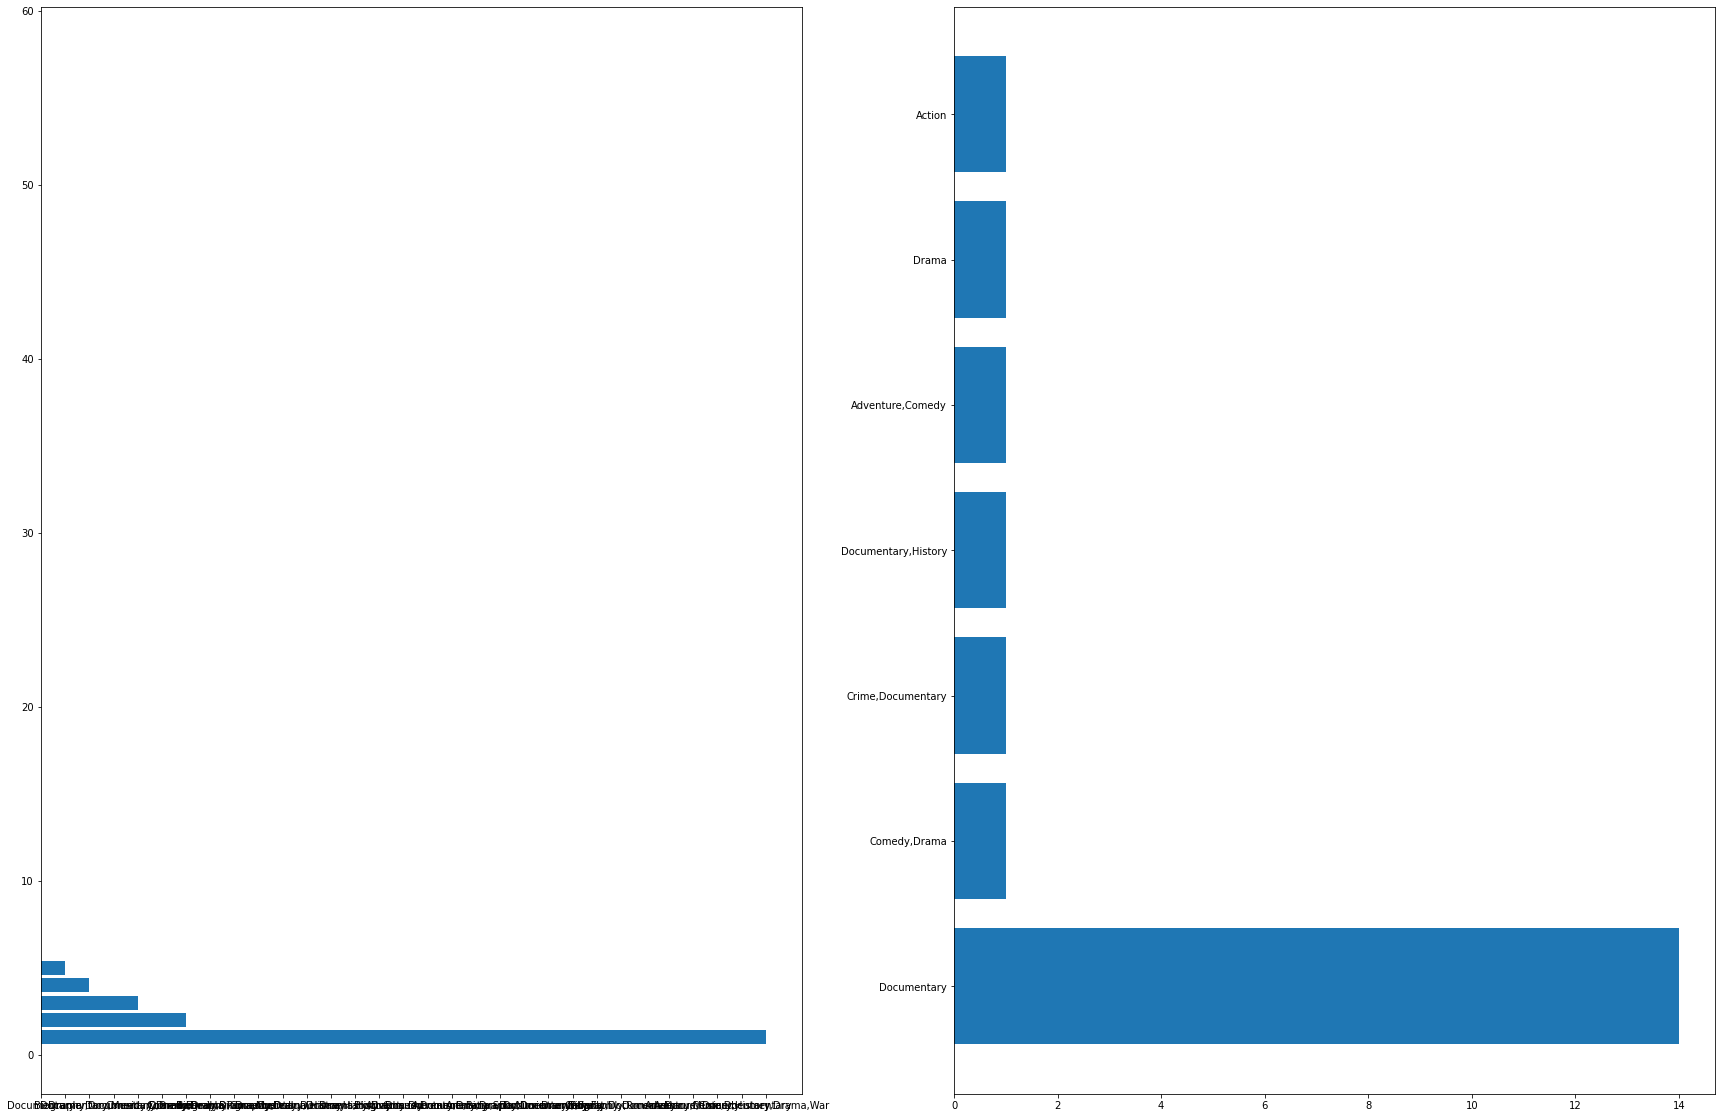

In [84]:
#data visualisation
#distribution of genres among top 20 movies
#distribution of genres among top 50 movies
#relationship between ratings and run_times
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(30,20))
x1=im_cleaned_100_count.index
y1=im_cleaned_100_count.values
X2=im_cleaned_20_count.index
y2=im_cleaned_100_count.values
ax1.barh
